# Feed-forward сети

Итак, давайте потренируемся тренировать нейронные сети прямого распространения (так как делали на паре)
При этом попробуем создать свою функцию активации на одном из слоев

In [1]:
# Сделаем необходимые импорты

In [1]:
import torch
import numpy as np

from torch import nn
import torchvision

In [14]:
from torch import optim
import torchvision.transforms as transforms
import torch.nn.functional as F
from tqdm import tqdm
import matplotlib.pyplot as plt ### воспользуемся для отображения изображения

In [2]:
# Загрузим датасет CIFAR-100, сразу же создадим dataloader для него
# Если вам не хватает вычислительных ресурсов, то можно вернуться к CIFAR-10

In [3]:
train_dataset = torchvision.datasets.CIFAR100(root='data/',
                                             train=True,  
                                             transform=transforms.ToTensor(), 
                                             download=True)


image, label = train_dataset[0]
print (image.size())
print (label)


Extracting data/cifar-100-python.tar.gz to data/
torch.Size([3, 32, 32])
19


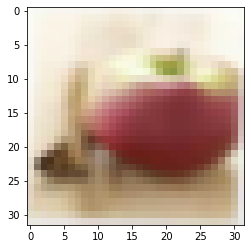

In [6]:
image, label = train_dataset[2]
plt.imshow(image.permute(1, 2, 0).numpy())

In [8]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=64, 
                                           shuffle=True)

In [9]:
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transforms.ToTensor())
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=4,
                                         shuffle=False)

Files already downloaded and verified


In [3]:
# Создайте собственную архитектуру! Можете использовать все, что угодно, но в ограничении на использование линейные слои (пока без сверток)
# Давайте добавим ограниченный Leaky_relu, то есть output = max(0.1x, 0.5x)
# Ваша задача добавить его в архитектуру сети как функцию активации

In [27]:
class Net(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 4 * hidden_dim)
        self.fc2 = nn.Linear(4 * hidden_dim,4 * hidden_dim)
        self.fc3 = nn.Linear(4 * hidden_dim, 2 * hidden_dim)
        self.fc4 = nn.Linear(2 * hidden_dim, hidden_dim)
        self.fc5 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        x = F.leaky_relu(x, 0.05)
        x = self.fc2(x)
        x = F.leaky_relu(x, 0.05)
        x = self.fc3(x)
        x = F.leaky_relu(x, 0.05)
        x = self.fc4(x)
        x = F.leaky_relu(x, 0.05)
        x = self.fc5(x)
        #x = F.softmax(x)
        return x
    
    def predict(self, x):
        x = x.view(x.shape[0], -1)
        
        x = self.fc1(x)
        x = F.leaky_relu(x, 0.05)
        x = self.fc2(x)
        x = F.leaky_relu(x, 0.05)
        x = self.fc3(x)
        x = F.leaky_relu(x, 0.05)
        x = self.fc4(x)
        x = F.leaky_relu(x, 0.05)
        x = self.fc5(x)
        x = F.softmax(x)
        return x


net = Net(3072, 100, 100)

In [28]:
# Запустить обучение (по аналогии с тем, что делали на паре)

In [29]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

In [30]:
for epoch in tqdm(range(10)):  
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0], data[1]

        # обнуляем градиент
        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # выводим статистику о процессе обучения
        running_loss += loss.item()
        if i % 300 == 0:    # печатаем каждые 300 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Training is finished!')

  0%|                                                                                           | 0/10 [00:00<?, ?it/s]

[1,     1] loss: 0.002
[1,   301] loss: 0.690
[1,   601] loss: 0.675


 10%|████████▎                                                                          | 1/10 [00:15<02:23, 15.99s/it]

[2,     1] loss: 0.002
[2,   301] loss: 0.616
[2,   601] loss: 0.602


 20%|████████████████▌                                                                  | 2/10 [00:32<02:09, 16.24s/it]

[3,     1] loss: 0.002
[3,   301] loss: 0.582
[3,   601] loss: 0.574


 30%|████████████████████████▉                                                          | 3/10 [00:49<01:55, 16.46s/it]

[4,     1] loss: 0.002
[4,   301] loss: 0.560
[4,   601] loss: 0.552


 40%|█████████████████████████████████▏                                                 | 4/10 [01:06<01:38, 16.48s/it]

[5,     1] loss: 0.002
[5,   301] loss: 0.539
[5,   601] loss: 0.534


 50%|█████████████████████████████████████████▌                                         | 5/10 [01:22<01:22, 16.45s/it]

[6,     1] loss: 0.002
[6,   301] loss: 0.524
[6,   601] loss: 0.518


 60%|█████████████████████████████████████████████████▊                                 | 6/10 [01:39<01:05, 16.42s/it]

[7,     1] loss: 0.002
[7,   301] loss: 0.511
[7,   601] loss: 0.508


 70%|██████████████████████████████████████████████████████████                         | 7/10 [01:55<00:49, 16.35s/it]

[8,     1] loss: 0.002
[8,   301] loss: 0.501
[8,   601] loss: 0.498


 80%|██████████████████████████████████████████████████████████████████▍                | 8/10 [02:11<00:32, 16.39s/it]

[9,     1] loss: 0.002
[9,   301] loss: 0.491
[9,   601] loss: 0.491


 90%|██████████████████████████████████████████████████████████████████████████▋        | 9/10 [02:27<00:16, 16.34s/it]

[10,     1] loss: 0.001
[10,   301] loss: 0.482
[10,   601] loss: 0.483


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [02:44<00:00, 16.43s/it]

Training is finished!


In [31]:
# Поменяем функцию Leaky_Relu

In [44]:
class Net(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 4 * hidden_dim)
        self.fc2 = nn.Linear(4 * hidden_dim,4 * hidden_dim)
        self.fc3 = nn.Linear(4 * hidden_dim, 2 * hidden_dim)
        self.fc4 = nn.Linear(2 * hidden_dim, hidden_dim)
        self.fc5 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        x = F.leaky_relu(0.5*x, 0.1)
        x = self.fc2(x)
        x = F.leaky_relu(0.5*x, 0.1)
        x = self.fc3(x)
        x = F.leaky_relu(0.5*x, 0.1)
        x = self.fc4(x)
        x = F.leaky_relu(0.5*x, 0.1)
        x = self.fc5(x)
        #x = F.softmax(x)
        return x
    
    def predict(self, x):
        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        x = F.leaky_relu(0.5*x, 0.1)
        x = self.fc2(x)
        x = F.leaky_relu(0.5*x, 0.1)
        x = self.fc3(x)
        x = F.leaky_relu(0.5*x, 0.1)
        x = self.fc4(x)
        x = F.leaky_relu(0.5*x, 0.1)
        x = self.fc5(x)
        x = F.softmax(x)
        return x


net = Net(3072, 100, 100)

In [45]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

In [46]:
for epoch in tqdm(range(10)):  
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0], data[1]

        # обнуляем градиент
        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # выводим статистику о процессе обучения
        running_loss += loss.item()
        if i % 300 == 0:    # печатаем каждые 300 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Training is finished!')

  0%|                                                                                           | 0/10 [00:00<?, ?it/s]

[1,     1] loss: 0.002
[1,   301] loss: 0.691
[1,   601] loss: 0.691


 10%|████████▎                                                                          | 1/10 [00:16<02:25, 16.19s/it]

[2,     1] loss: 0.002
[2,   301] loss: 0.691
[2,   601] loss: 0.691


 20%|████████████████▌                                                                  | 2/10 [00:33<02:11, 16.38s/it]

[3,     1] loss: 0.002
[3,   301] loss: 0.691
[3,   601] loss: 0.691


 30%|████████████████████████▉                                                          | 3/10 [00:48<01:53, 16.26s/it]

[4,     1] loss: 0.002
[4,   301] loss: 0.691
[4,   601] loss: 0.691


 40%|█████████████████████████████████▏                                                 | 4/10 [01:05<01:37, 16.30s/it]

[5,     1] loss: 0.002
[5,   301] loss: 0.691
[5,   601] loss: 0.691


 50%|█████████████████████████████████████████▌                                         | 5/10 [01:21<01:21, 16.22s/it]

[6,     1] loss: 0.002
[6,   301] loss: 0.690
[6,   601] loss: 0.690


 60%|█████████████████████████████████████████████████▊                                 | 6/10 [01:37<01:04, 16.12s/it]

[7,     1] loss: 0.002
[7,   301] loss: 0.688
[7,   601] loss: 0.675


 70%|██████████████████████████████████████████████████████████                         | 7/10 [01:54<00:49, 16.46s/it]

[8,     1] loss: 0.002
[8,   301] loss: 0.648
[8,   601] loss: 0.644


 80%|██████████████████████████████████████████████████████████████████▍                | 8/10 [02:11<00:33, 16.65s/it]

[9,     1] loss: 0.002
[9,   301] loss: 0.636
[9,   601] loss: 0.634


 90%|██████████████████████████████████████████████████████████████████████████▋        | 9/10 [02:27<00:16, 16.41s/it]

[10,     1] loss: 0.002
[10,   301] loss: 0.628
[10,   601] loss: 0.623


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [02:43<00:00, 16.40s/it]

Training is finished!


### Вывод:

с ограниченным Leaky-Relu обучение идет медленнее

In [53]:
# Попробуем меньше слоев

In [50]:
class Net(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 4 * hidden_dim)
        self.fc2 = nn.Linear(4 * hidden_dim,2 * hidden_dim)
        self.fc3 = nn.Linear(2 * hidden_dim, hidden_dim)
        self.fc4 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        x = F.leaky_relu(0.5*x, 0.1)
        x = self.fc2(x)
        x = F.leaky_relu(0.5*x, 0.1)
        x = self.fc3(x)
        x = F.leaky_relu(0.5*x, 0.1)
        x = self.fc4(x)

        #x = F.softmax(x)
        return x
    
    def predict(self, x):
        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        x = F.leaky_relu(0.5*x, 0.1)
        x = self.fc2(x)
        x = F.leaky_relu(0.5*x, 0.1)
        x = self.fc3(x)
        x = F.leaky_relu(0.5*x, 0.1)
        x = self.fc4(x)
        x = F.softmax(x)
        return x


net = Net(3072, 100, 100)

In [51]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

In [52]:
for epoch in tqdm(range(10)):  
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0], data[1]

        # обнуляем градиент
        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # выводим статистику о процессе обучения
        running_loss += loss.item()
        if i % 300 == 0:    # печатаем каждые 300 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Training is finished!')

  0%|                                                                                           | 0/10 [00:00<?, ?it/s]

[1,     1] loss: 0.002
[1,   301] loss: 0.691
[1,   601] loss: 0.691


 10%|████████▎                                                                          | 1/10 [00:14<02:14, 14.92s/it]

[2,     1] loss: 0.002
[2,   301] loss: 0.690
[2,   601] loss: 0.689


 20%|████████████████▌                                                                  | 2/10 [00:29<01:58, 14.84s/it]

[3,     1] loss: 0.002
[3,   301] loss: 0.659
[3,   601] loss: 0.641


 30%|████████████████████████▉                                                          | 3/10 [00:44<01:43, 14.81s/it]

[4,     1] loss: 0.002
[4,   301] loss: 0.620
[4,   601] loss: 0.612


 40%|█████████████████████████████████▏                                                 | 4/10 [00:59<01:28, 14.82s/it]

[5,     1] loss: 0.002
[5,   301] loss: 0.603
[5,   601] loss: 0.597


 50%|█████████████████████████████████████████▌                                         | 5/10 [01:14<01:14, 14.96s/it]

[6,     1] loss: 0.002
[6,   301] loss: 0.592
[6,   601] loss: 0.588


 60%|█████████████████████████████████████████████████▊                                 | 6/10 [01:29<01:00, 15.06s/it]

[7,     1] loss: 0.002
[7,   301] loss: 0.581
[7,   601] loss: 0.576


 70%|██████████████████████████████████████████████████████████                         | 7/10 [01:45<00:46, 15.36s/it]

[8,     1] loss: 0.002
[8,   301] loss: 0.565
[8,   601] loss: 0.563


 80%|██████████████████████████████████████████████████████████████████▍                | 8/10 [02:01<00:30, 15.35s/it]

[9,     1] loss: 0.002
[9,   301] loss: 0.556
[9,   601] loss: 0.551


 90%|██████████████████████████████████████████████████████████████████████████▋        | 9/10 [02:16<00:15, 15.31s/it]

[10,     1] loss: 0.002
[10,   301] loss: 0.544
[10,   601] loss: 0.541


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [02:32<00:00, 15.29s/it]

Training is finished!


Обучение идет быстрее на меньшем количестве слоев

In [54]:
# Попробуем другие функции

In [55]:
class Net(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 4 * hidden_dim)
        self.fc2 = nn.Linear(4 * hidden_dim,2 * hidden_dim)
        self.fc3 = nn.Linear(2 * hidden_dim, hidden_dim)
        self.fc4 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        x = F.leaky_relu(x, 0.1)
        x = self.fc2(x)
        x = F.elu(x)
        x = self.fc3(x)
        x = F.elu(x)
        x = self.fc4(x)

        #x = F.softmax(x)
        return x
    
    def predict(self, x):
        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        x = F.leaky_relu(x, 0.1)
        x = self.fc2(x)
        x = F.elu(x)
        x = self.fc3(x)
        x = F.elu(x)
        x = self.fc4(x)
        x = F.softmax(x)
        return x


net = Net(3072, 100, 100)

In [56]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

In [57]:
for epoch in tqdm(range(10)):  
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0], data[1]

        # обнуляем градиент
        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # выводим статистику о процессе обучения
        running_loss += loss.item()
        if i % 300 == 0:    # печатаем каждые 300 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Training is finished!')

  0%|                                                                                           | 0/10 [00:00<?, ?it/s]

[1,     1] loss: 0.002
[1,   301] loss: 0.666
[1,   601] loss: 0.612


 10%|████████▎                                                                          | 1/10 [00:15<02:17, 15.22s/it]

[2,     1] loss: 0.002
[2,   301] loss: 0.573
[2,   601] loss: 0.561


 20%|████████████████▌                                                                  | 2/10 [00:30<02:02, 15.26s/it]

[3,     1] loss: 0.002
[3,   301] loss: 0.538
[3,   601] loss: 0.534


 30%|████████████████████████▉                                                          | 3/10 [00:46<01:47, 15.36s/it]

[4,     1] loss: 0.002
[4,   301] loss: 0.519
[4,   601] loss: 0.512


 40%|█████████████████████████████████▏                                                 | 4/10 [01:01<01:32, 15.36s/it]

[5,     1] loss: 0.002
[5,   301] loss: 0.503
[5,   601] loss: 0.501


 50%|█████████████████████████████████████████▌                                         | 5/10 [01:17<01:17, 15.45s/it]

[6,     1] loss: 0.002
[6,   301] loss: 0.489
[6,   601] loss: 0.493


 60%|█████████████████████████████████████████████████▊                                 | 6/10 [01:34<01:04, 16.09s/it]

[7,     1] loss: 0.002
[7,   301] loss: 0.480
[7,   601] loss: 0.482


 70%|██████████████████████████████████████████████████████████                         | 7/10 [01:51<00:48, 16.28s/it]

[8,     1] loss: 0.002
[8,   301] loss: 0.472
[8,   601] loss: 0.473


 80%|██████████████████████████████████████████████████████████████████▍                | 8/10 [02:06<00:31, 15.95s/it]

[9,     1] loss: 0.002
[9,   301] loss: 0.461
[9,   601] loss: 0.465


 90%|██████████████████████████████████████████████████████████████████████████▋        | 9/10 [02:21<00:15, 15.72s/it]

[10,     1] loss: 0.002
[10,   301] loss: 0.454
[10,   601] loss: 0.459


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [02:39<00:00, 15.99s/it]

Training is finished!


Здесь обучение быстрее